Import necessary libraries

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics         import accuracy_score

Connect your Google Drive. 
Since the files are quite big, it is much more convinient to upload them in a cloud service.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Read prepared train-test files

In [ ]:
link_to_drive = '/content/drive/MyDrive/DL_Final_Project/'

In [ ]:
X_val   = np.load(link_to_drive + 'X_val.npy')
X_train = np.load(link_to_drive + 'X_train.npy')
y_val   = np.load(link_to_drive + 'y_val.npy')
y_train = np.load(link_to_drive + 'y_train.npy')
X_test  = np.load(link_to_drive + 'X_test.npy')
y_test  = pd.read_csv(link_to_drive + 'Test.csv')

Build a Convolutional Neural Network (CNN).

In [ ]:
def model_NN(X_train):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(43, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Train the CNN model

In [ ]:
epochs = 20
list_bs = [8, 16, 32, 64, 128]
results = []
times = []
for batch_size in list_bs:
  model = model_NN(X_train)
  t = time.process_time()
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))
  predict_x = model.predict(X_test) 
  classes_x = np.argmax(predict_x,axis=1)
  labels = y_test['ClassId'].values
  results.append(accuracy_score(labels, classes_x))
  print(accuracy_score(labels, classes_x))
  elapsed_time = time.process_time() - t
  times.append(elapsed_time)

Epoch 1/20
3921/3921 [==============================] - 34s 9ms/step - loss: 1.8662 - accuracy: 0.4967 - val_loss: 0.8031 - val_accuracy: 0.7793
Epoch 2/20
3921/3921 [==============================] - 35s 9ms/step - loss: 0.9556 - accuracy: 0.7195 - val_loss: 0.4502 - val_accuracy: 0.8611
Epoch 3/20
3921/3921 [==============================] - 33s 9ms/step - loss: 0.8359 - accuracy: 0.7525 - val_loss: 0.3177 - val_accuracy: 0.9021
Epoch 4/20
3921/3921 [==============================] - 33s 9ms/step - loss: 0.7639 - accuracy: 0.7700 - val_loss: 0.3441 - val_accuracy: 0.8873
Epoch 5/20
3921/3921 [==============================] - 34s 9ms/step - loss: 0.7268 - accuracy: 0.7831 - val_loss: 0.3267 - val_accuracy: 0.9035
Epoch 6/20
3921/3921 [==============================] - 34s 9ms/step - loss: 0.7218 - accuracy: 0.7875 - val_loss: 0.2846 - val_accuracy: 0.9161
Epoch 7/20
3921/3921 [==============================] - 33s 8ms/step - loss: 0.7197 - accuracy: 0.7885 - val_loss: 0.2781 - val_ac

Plot the graphs for accuracy and time for different batch sizes

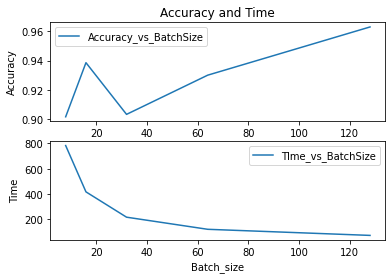

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(list_bs, results, label='Accuracy_vs_BatchSize')
plt.title('Accuracy and Time')
plt.xlabel('Batch_size')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(list_bs, times, label='TIme_vs_BatchSize')
plt.xlabel('Batch_size')
plt.ylabel('Time')
plt.legend()
plt.savefig('BatchSize.png')

Test the trained model with test dataset

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

labels = y_test['ClassId'].values
print(accuracy_score(labels, classes_x))

0.9630245447347585
